In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Representation/features selection 

Closely tied with the concept of learning is a concept of *representation*. 

In [2]:
features = np.load("spirals_features.npy")
labels = np.load("spirals_labels.npy")

In [3]:
red  = features[labels==0]
blue = features[labels==1]

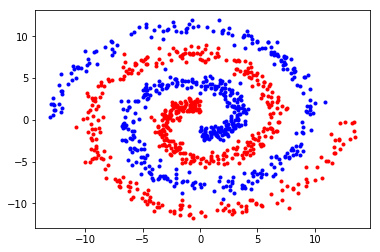

In [4]:
plt.plot(red[:,0], red[:,1],'.r')
plt.plot(blue[:,0], blue[:,1],'.b')

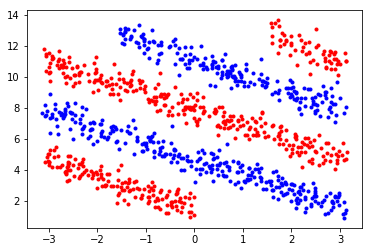

In [5]:
plt.plot(np.arctan2(red[:,0], red[:,1]), np.linalg.norm(red, axis=1),'.r')
plt.plot(np.arctan2(blue[:,0], blue[:,1]), np.linalg.norm(blue, axis=1),'.b');

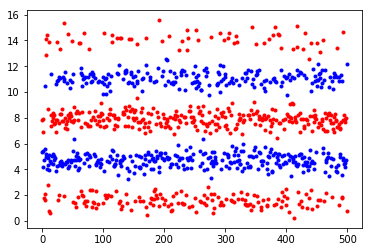

In [6]:
n = len(red)
plt.plot(np.arange(n), np.arctan2(red[:,0],red[:,1])   +  np.linalg.norm(red, axis=1), '.r')
plt.plot(np.arange(n), np.arctan2(blue[:,0],blue[:,1]) +  np.linalg.norm(blue, axis=1),'.b')

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [8]:
size = 128
model = nn.Sequential(nn.Linear(in_features=2, out_features=size),
                      nn.ReLU(), 
                      nn.Linear(in_features=size, out_features=size),
                      nn.ReLU(), 
                      nn.Linear(in_features=size, out_features=size//2),
                      nn.ReLU(), 
                      nn.Linear(in_features=size//2, out_features=1), 
                      nn.Sigmoid())

In [9]:
t_data = torch.from_numpy(features.astype('float32'))

In [10]:
t_labels = torch.from_numpy(labels.astype('float32')).view(-1,1)

In [11]:
dataset = torch.utils.data.TensorDataset(t_data, t_labels)

In [12]:
train_data, test_data = torch.utils.data.random_split(dataset,(750,250))

In [13]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=50)

In [14]:
loss_f = nn.BCELoss()

In [15]:
sgd = torch.optim.SGD(model.parameters(), lr =0.001, momentum=0.2)

In [16]:
%%time
for epoch in range(2000):
    for batch in train_loader:
        sgd.zero_grad()
        f,l = batch
        pred = model(f)
        loss =   loss_f(pred,l) 
        loss.backward()
        sgd.step()
print(loss)        

tensor(0.6208, grad_fn=<BinaryCrossEntropyBackward>)
CPU times: user 7min 21s, sys: 970 ms, total: 7min 22s
Wall time: 40.5 s


In [17]:
pred_valid = model(test_data[:][0])
pred_class = (pred_valid>0.5).long()
torch.sum(pred_class == test_data[:][1].long()).item()/len(test_data)

0.58

In [18]:
def polar(xy):
    phi = np.arctan2(xy[:,1], xy[:,0])
    r   = np.linalg.norm(xy, axis=1)
    return np.stack((phi,r), axis=1)

def cartesian(fir):
    x = fir[:,1]*np.cos(fir[:,0])
    y = fir[:,1]*np.sin(fir[:,0])
    
    return np.stack((x,y), axis=1)

In [19]:
size = 128
polar_model = nn.Sequential(nn.Linear(in_features=2, out_features=size),
                      nn.ReLU(), 
                      nn.Linear(in_features=size, out_features=size),
                      nn.ReLU(), 
                      nn.Linear(in_features=size, out_features=size//2),
                      nn.ReLU(), 
                      nn.Linear(in_features=size//2, out_features=1), 
                      nn.Sigmoid())

In [20]:
t_data_polar = torch.from_numpy(polar(features.astype('float32')))

In [21]:
dataset_polar = torch.utils.data.TensorDataset(t_data_polar, t_labels)

In [22]:
train_data_polar, test_data_polar = torch.utils.data.random_split(dataset_polar,(750,250))

In [23]:
train_loader_polar = torch.utils.data.DataLoader(train_data_polar, batch_size=50)

In [24]:
loss_f = nn.BCELoss()

In [25]:
sgd_polar = torch.optim.SGD(polar_model.parameters(), lr =0.001, momentum=0.2)

In [26]:
%%time
for epoch in range(2000):
    for batch in train_loader_polar:
        sgd_polar.zero_grad()
        f,l = batch
        pred = polar_model(f)
        loss =   loss_f(pred,l) 
        loss.backward()
        sgd_polar.step()
print(loss)        

tensor(0.4775, grad_fn=<BinaryCrossEntropyBackward>)
CPU times: user 7min 37s, sys: 1.33 s, total: 7min 38s
Wall time: 42.1 s


In [27]:
pred_valid = polar_model(test_data_polar[:][0])
pred_class = (pred_valid>0.5).long()
torch.sum(pred_class == test_data_polar[:][1].long()).item()/len(test_data)

0.632